# Pymaceuticals Inc.
---

### Analysis

Tumor Volume vs. Time Point for a Single Mouse Treated with Capomulin:
The line plot shows the trend of tumor volume over time for a specific mouse treated with Capomulin. As the time point increases, the tumor volume tends to decrease, indicating a potential response to the Capomulin treatment.
The treatment seems to have a notable effect on reducing the tumor volume over the course of the treatment period.


Mouse Weight vs. Average Tumor Volume for Capomulin Regimen:
The scatter plot illustrates the relationship between mouse weight and the average observed tumor volume for the entire Capomulin regimen.
There is a positive linear trend between mouse weight and average tumor volume, suggesting that as the mouse weight increases, the average tumor volume tends to increase as well.
The correlation coefficient and R-squared value support the presence of a moderately strong positive correlation between mouse weight and average observed tumor volume, indicating that mouse weight can be a predictor of tumor volume in the Capomulin regimen.


Distribution of Tumor Volume for Each Treatment Group:
The box plot displays the distribution of tumor volume for each treatment group, including Capomulin, Ramicane, Infubinol, and Ceftamin.
Capomulin and Ramicane appear to have lower median tumor volumes compared to Infubinol and Ceftamin, suggesting that these two treatments might be more effective in reducing tumor size in the study.
Infubinol has a larger interquartile range (IQR) compared to the other treatments, indicating more variability in tumor volume within this group.
 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata , on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [58]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(num_mice)

249


In [59]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID'] == "g989", :]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index)
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [62]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = cleaned_data["Mouse ID"].nunique()
print(clean_num_mice)

248


## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.rename(columns={'mean': 'Mean Tumor Volume',
                                              'median': 'Median Tumor Volume',
                                              'var': 'Tumor Volume Variance',
                                              'std': 'Tumor Volume Std. Dev.',
                                              'sem': 'Tumor Volume Std. Err.'
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats_agg = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

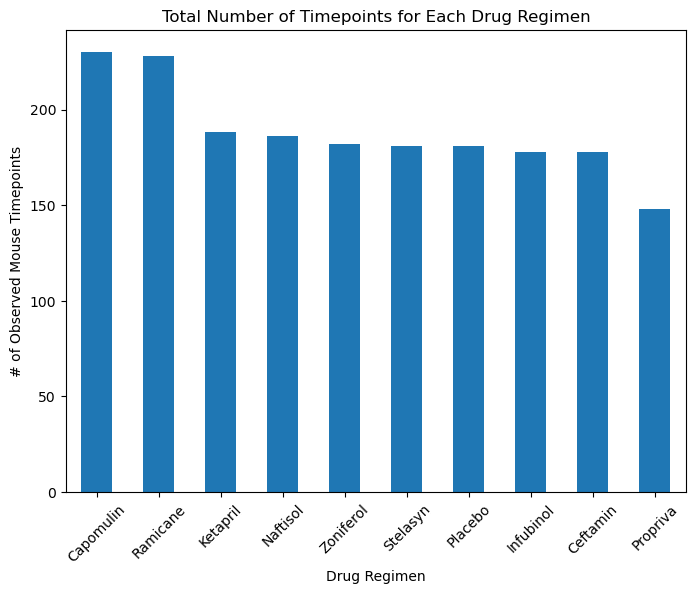

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = cleaned_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', figsize=(8, 6))

plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)

plt.show()

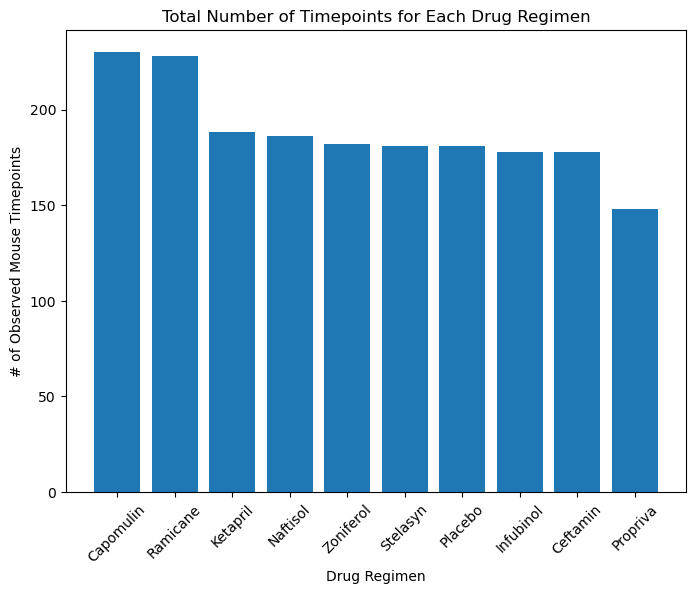

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts_pyplot = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(drug_counts.index, drug_counts_pyplot.values)

plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)

plt.show()

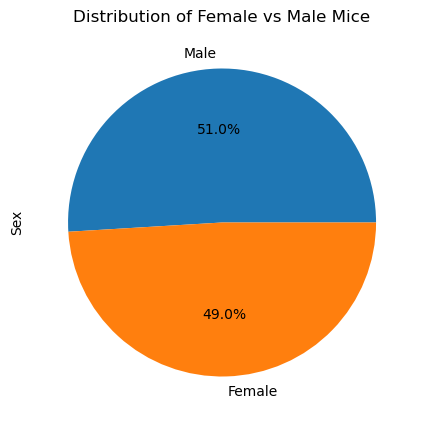

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))

plt.title('Distribution of Female vs Male Mice')

plt.show()

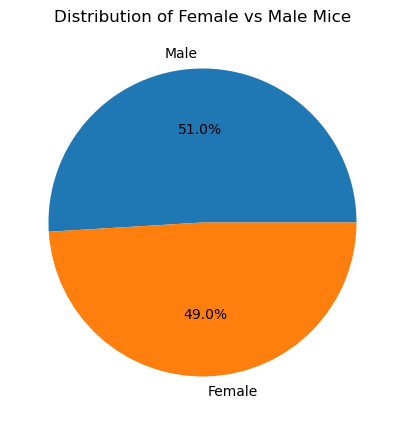

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution_pyplot = cleaned_data['Sex'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_distribution, labels=gender_distribution_pyplot.index, autopct='%1.1f%%')

plt.title('Distribution of Female vs Male Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

In [100]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(treatment_data)
    
     # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


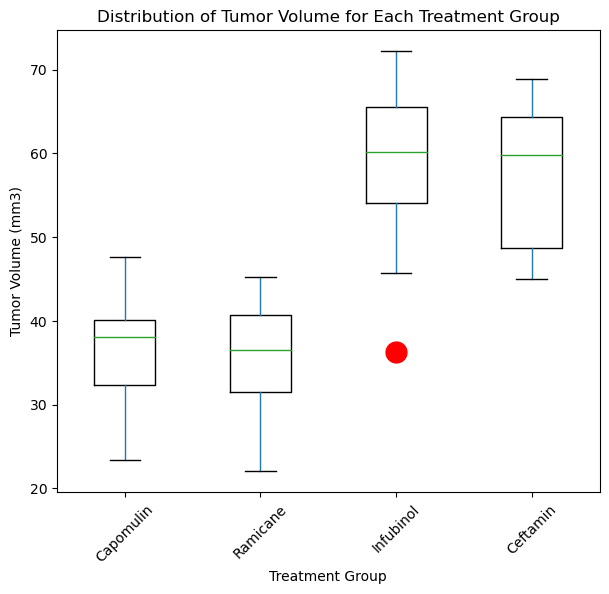

In [120]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a DataFrame using the tumor_volume_data list
df = pd.DataFrame(tumor_volume_data, index=treatments).T

# Generate the box plot
boxplot_tumor= df.boxplot(figsize=(7, 6), flierprops=dict(marker='o', markerfacecolor='red',
                markeredgecolor='red', markersize='15'), boxprops=dict(color='black'))
boxplot_tumor.grid(False)

# Set plot title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Line and Scatter Plots

please input the Mouse ID that you would like to analize(Example 'l509' ): l509


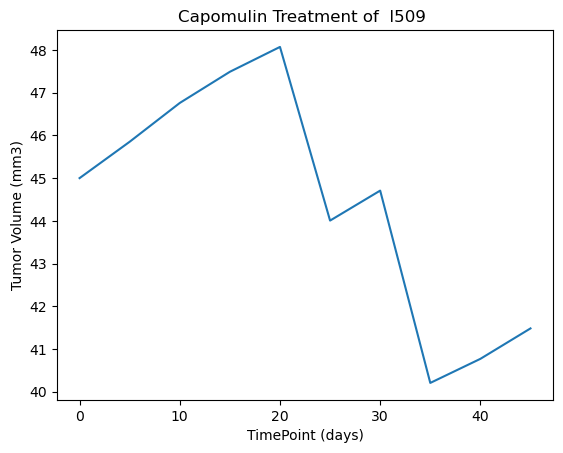

In [140]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = input("please input the Mouse ID that you would like to analize(Example 'l509' ): ")
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'],)

plt.title(f"Capomulin Treatment of  {mouse_id} ")
plt.xlabel('TimePoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

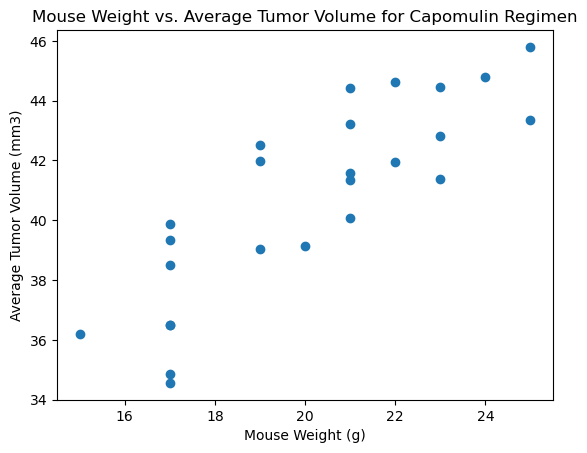

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(capomulin_data.groupby('Mouse ID')['Weight (g)'].mean(), average_tumor_volume)

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation Coefficient: 0.84
Regression Equation: y = 0.95x + 21.55


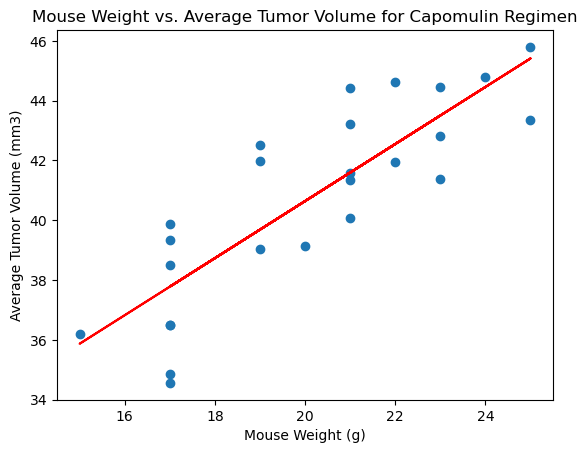

The correlation between mouse weight and the average tumor volume is 0.84


In [152]:
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_volume)[0]
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Create a linear regression model
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, average_tumor_volume)
print(f"Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

# Create the scatter plot of mouse weight vs. average observed tumor volume
plt.scatter(mouse_weight, average_tumor_volume)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot the linear regression line
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')

plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")